In [1]:
%run Data_Science_Preprocessing.ipynb

2020-11-02 17:37:31 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-11-02 17:37:31 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-11-02 17:37:31 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

2020-11-02 17:39:52 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
durchwachstumfnl.describe()

,AGR
count,16.000000
mean,0.459213
std,0.014724
min,0.434995
25%,0.452392
50%,0.455380
75%,0.464511
max,0.498992


Durchwachstumfnl sind die prognostizierten durchschnittlichen täglichen Wachstumsraten aller deutschen Bundesländer. Prognosen wurden mithilfe von erhobenen Daten bis zum 30.06 berechnet.

In [4]:
compLK.describe()

,AGR,Bev.D.Ew./km²
count,322.000000,322.000000
mean,10.106238,316.279503
std,15.063383,409.852275
min,0.516924,36.000000
25%,3.515457,106.000000
50%,5.343918,160.000000
75%,9.073802,301.750000
max,110.979221,2954.000000


compLK sind die durchschnittlichen täglichen Wachstumsraten deutscher Landkreis und die Bevölkerungsdichte jedes deutschen Landkreises. 

In [5]:
DFCounty[['AGR','Density']].describe()

,AGR,Density
count,1637.000000,1637.000000
mean,3.568806,89.552584
std,1.667224,590.929109
min,0.310559,0.196519
25%,2.412748,6.270132
50%,3.414753,16.602977
75%,4.483766,44.615746
max,15.704115,18671.140601


DFCounty sind die durchschnittlichen täglichen Wachstumsraten us-amerikanischer Counties. Sie sind mit deutschen Landkreisen vergleichbar. Außerdem wurd noch dieBevölkerungsdichte mit Daten von 2010 erhoben. Da es in den USA keine Einwohnermeldeämter gibt machen sie alle 10 Jahre eine Volkszählung. Die letzte Volkszählung war 2010. 

In [6]:
d['Hochsauerlandkreis'].describe()

,cases,cases_per_100k,deaths,deaths_per_100k,täglicher Wachstum,dailycases,Rate,kumcases,dailydeaths,kumdeaths
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,413.058824,158.579060,4.485294,1.721966,0.017012,14.264706,2.085031,710.411765,0.264706,4.558824
std,160.697257,61.693931,7.306698,2.805142,0.116643,32.436674,10.709041,232.711226,1.589308,7.438067
min,109.000000,41.846600,0.000000,0.000000,-0.617544,0.000000,-61.754386,252.000000,0.000000,0.000000
25%,252.750000,97.034225,0.000000,0.000000,0.001647,1.000000,0.167025,482.000000,0.000000,0.000000
50%,449.000000,172.377400,0.000000,0.000000,0.010620,5.500000,1.273942,783.000000,0.000000,0.000000
75%,560.500000,215.183775,13.250000,5.086875,0.034457,15.250000,4.486483,921.500000,0.000000,13.250000
max,609.000000,233.803600,18.000000,6.910500,0.316547,252.000000,24.460432,970.000000,13.000000,18.000000


Über d[] lassen sich deutsche Landkreise aufrufen. Dort findet man Daten zu täglichen Neuinfektionen und Toden und deren tägliche Veränderung. Damit wurde compLK berechnet.

In [7]:
dic['Albany County'].describe()

,cases,dailycases,Rate
count,161.000000,161.000000,161.000000
mean,801.149068,13.055901,5.986782
std,825.417139,16.796669,19.165406
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,446.000000,8.000000,0.551102
75%,1700.000000,19.000000,3.347639
max,2102.000000,98.000000,150.000000


Über dic[] lassen sich amerikanische Counties aufrufen. Dort findet man Daten zu täglichen Neuinfektionen und deren tägliche Veränderung. Damit wurde DFCounty berechnet.

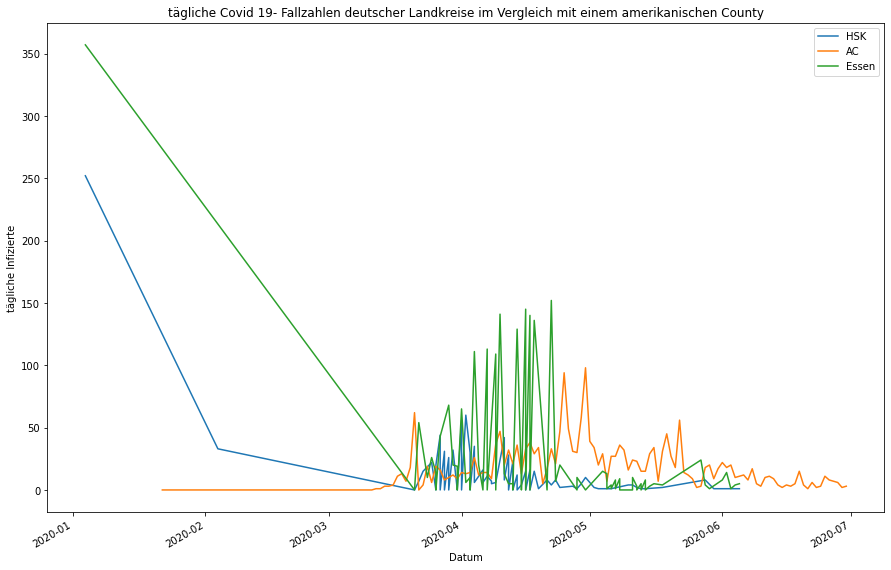

In [75]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte')

plt.show()

Man kann sehen, dass die Daten erst ab mitte März wirklich brauchbar sind, da vorher der Virus auch noch nicht in den westlichen Staaten vorhanden war

Text(0, 0.5, 'tägliche Todeszahlen deutscher Landkreise')

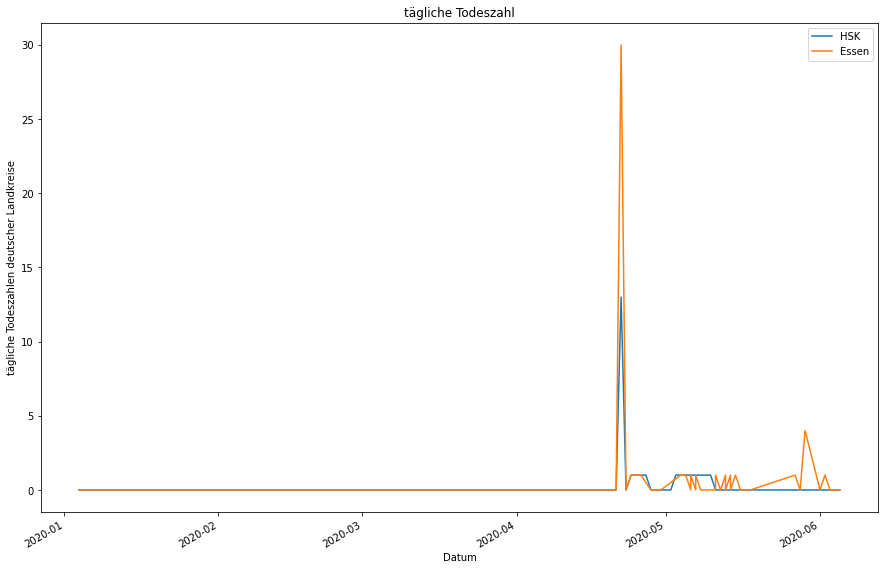

In [76]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen deutscher Landkreise')

Text(0.5, 1.0, 'Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')

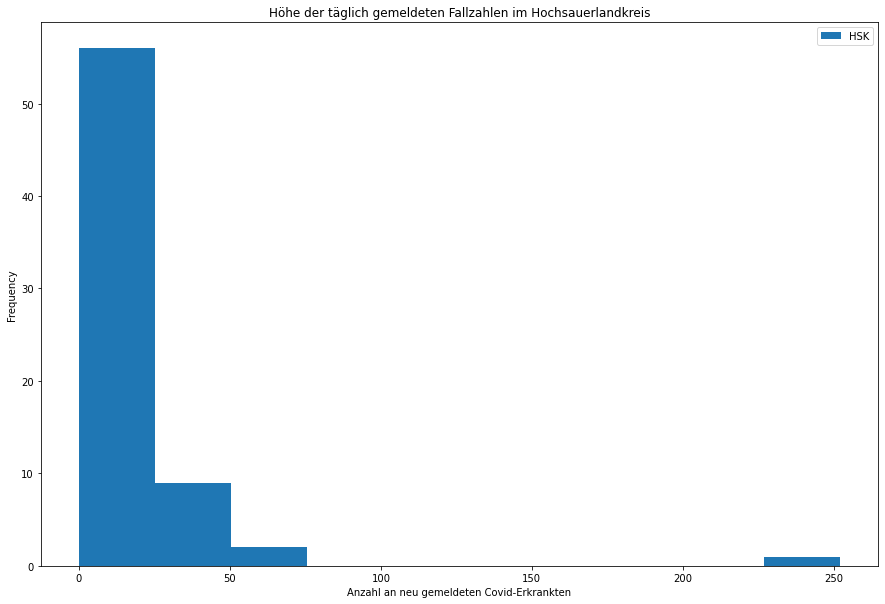

In [77]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
d['Hochsauerlandkreis'].plot(kind='hist', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
ax.set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten')
ax.set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')

Zeigt an dass die meisten täglichen Meldungen Meldungen mit zwischen 0 und 25 neue Infizierten hatten
Hat nicht so geklappt wie es sollte (Sollte zsmhang zwischen gemeldeten Wochentag und der höhe der Infektionszahlen zeigen)

2020-11-02 17:54:53 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-02 17:54:53 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-02 17:54:53 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-02 17:54:53 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


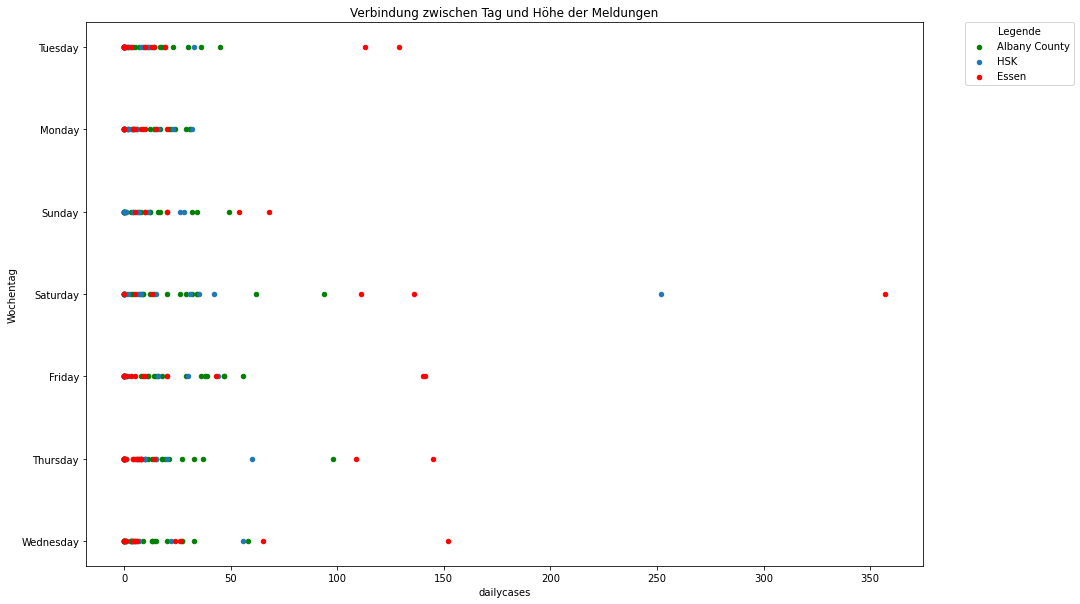

In [78]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
dic['Albany County'].plot(kind='scatter', x = 'dailycases', y= 'Weekday', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
_=ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Zeigt das an was eigentlich das Histogramm nachweisen sollte. Man sieht dass kein Zusammenhang zwischen dem Wochentag und der höhe der Meldung besteht

In [12]:
import datetime as dt
import statsmodels.formula.api as smf

In [13]:
# bundzuwachsraw_1 Werte der Bundesländer bis zum 30.06
# bundzuwachsraw_2 Werte der Bundesländer ab de0 01.07
# Das Datum muss in einen Float umgewandelt werden um damit rechnen zu können
bundzuwachsraw_1['date'] = bundzuwachsraw_1.index
bundzuwachsraw_1['datef'] = pd.to_datetime(bundzuwachsraw_1['date'])
bundzuwachsraw_1['datef']=bundzuwachsraw_1['datef'].map(dt.datetime.toordinal)
bundzuwachsraw_2['date'] = bundzuwachsraw_2.index
bundzuwachsraw_2['datef'] = pd.to_datetime(bundzuwachsraw_2['date'])
bundzuwachsraw_2['datef']=bundzuwachsraw_2['datef'].map(dt.datetime.toordinal)

In [14]:
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lmges = smf.ols(formula='Gesamt ~ datef', data=bundzuwachsraw_1).fit()
predges = lmges.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['predictiongesamt'] = predges

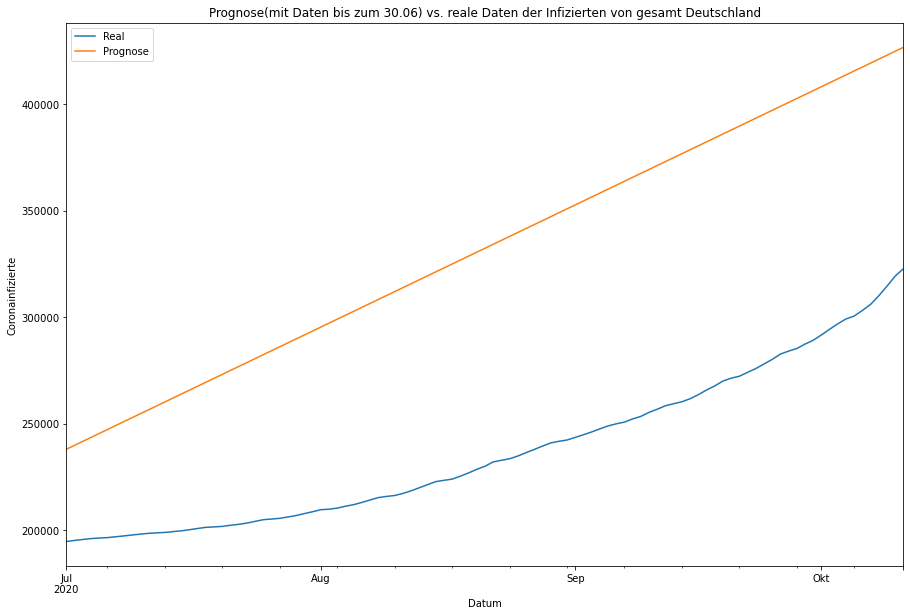

In [79]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'Gesamt', ax=ax, label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'predictiongesamt', ax=ax, label="Prognose")
ax.set_title('Prognose(mit Daten bis zum 30.06) vs. reale Daten der Infizierten von gesamt Deutschland')
ax.set_xlabel('Datum')
ax.set_ylabel('Coronainfizierte')
plt.show()

Man kann sehr gut sehen, dass die realen Daten unter der Prognose liegen, somit kann man sagen, dass es in Deutschland keine exponentielle Steigung der Coronainfizierten gab.

In [16]:
# Wurde nur für tests gelöscht trägt auf eine Deutschlandkarte Puntke für alle Landeshauptstädte ein


#bundesland_capital = pd.read_csv('bundcap.csv')
#bundesland_capital = gpd.GeoDataFrame(bundesland_capital, geometry=gpd.points_from_xy(bundesland_capital.Longitude, bundesland_capital.Latitude))
#bundesland_capitalname = bundesland_capital 
#germap = gpd.read_file('geomap/vg2500_bld.shp')
#ax = germap.plot(color='orange')
#ax = bundesland_capital.plot(ax=ax, color='red')
#ax = bundesland_capitalname.plot(ax=ax, color='blue') #Damit sollen eigentlich die Städtenamen angezeigt werden und keine blauen Punke
#plt.rcParams['figure.figsize'] = [21, 9]
#ax.set_title('Deutschland')
#ax.set_axis_off()
#plt.show()

2020-11-02 17:55:14 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x000002836294F248>
2020-11-02 17:55:14 [fiona.env] DEBUG: Starting outermost env
2020-11-02 17:55:14 [fiona.env] DEBUG: No GDAL environment exists
2020-11-02 17:55:14 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x0000028360AE88C8> created
2020-11-02 17:55:14 [fiona._env] DEBUG: Logging error handler pushed.
2020-11-02 17:55:14 [fiona._env] DEBUG: All drivers registered.
2020-11-02 17:55:14 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-11-02 17:55:14 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-11-02 17:55:14 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x0000028360AE88C8>.
2020-11-02 17:55:14 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x0000028360AE88C8> with options

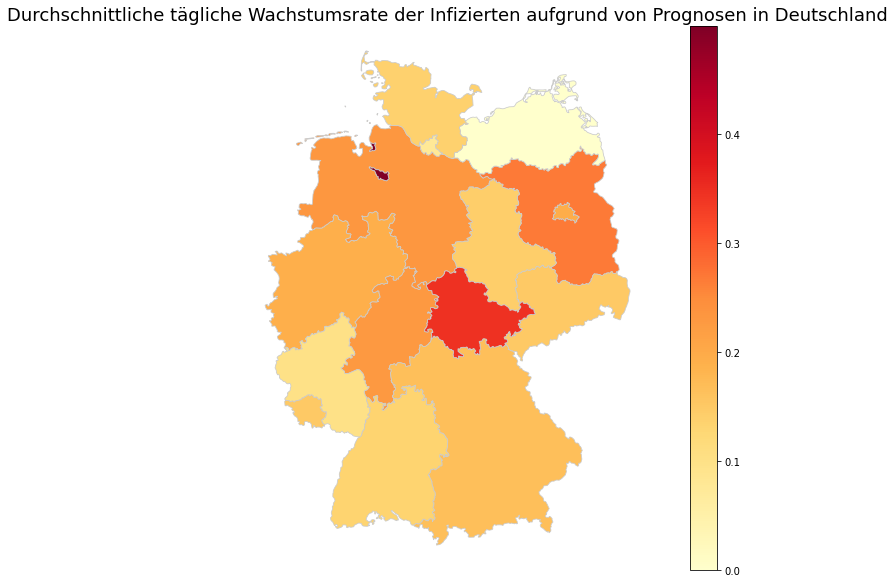

In [80]:
import geopandas as gpd

DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(15, 10))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten aufgrund von Prognosen in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch Thüringen und Bremen im Vergleich sehr hohe. Die Prognosen wurden mithilfe von Linearer Regression und realen Daten, die bis zum 30.06 erhoben wurden, aufgestellt

In [18]:
lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

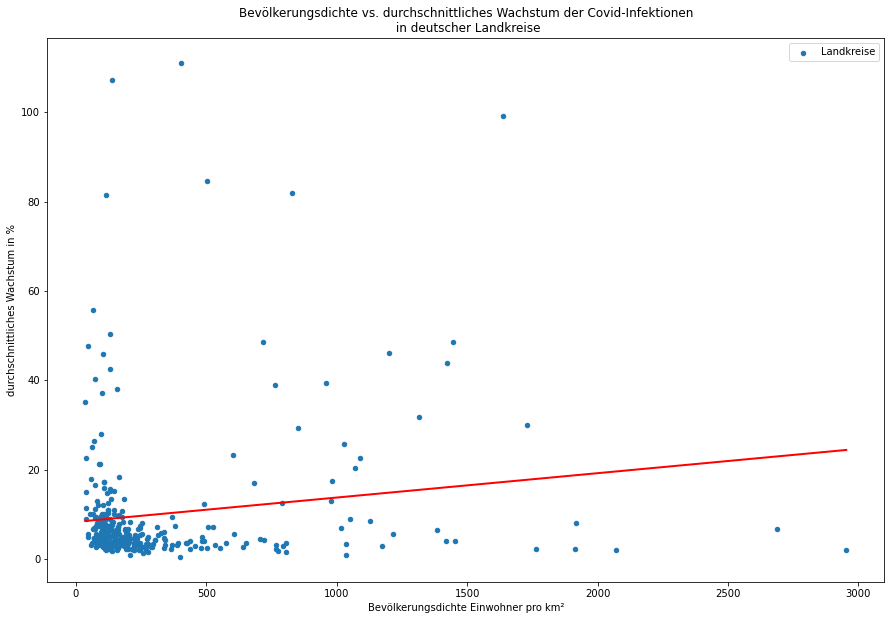

In [74]:

f, ax = plt.subplots(1, 1, figsize = (15, 10))
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")
plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen\n in deutscher Landkreise')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [20]:
print('p-Wert: \n',lm.pvalues)
compLKcorr = compLK.drop(columns=['Landkreise/Kreis'])
print('\nKorrelation: \n',compLKcorr.corr())
lm.summary()

p-Wert: 
 Intercept    2.664575e-14
Dichte       7.765522e-03
dtype: float64

Korrelation: 
                    AGR  Bev.D.Ew./km²
AGR            1.00000        0.14811
Bev.D.Ew./km²  0.14811        1.00000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGR   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     7.177
Date:                 Mo, 02 Nov 2020   Prob (F-statistic):            0.00777
Time:                        17:38:56   Log-Likelihood:                -1326.2
No. Observations:                 322   AIC:                             2656.
Df Residuals:                     320   BIC:                             2664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3846      1.051      7.979      0.000       6.317      10.452
Dichte         0.0054      0.002      2.679      0.008       0.001       0.009
==============================================================================
Omnibus:                      294.563   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5516.415
Skew:                           3.927   Prob(JB):                         0.00
Kurtosis:                      21.695   Cond. No.                         654.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 0.083846 + 0.000054x steigen. Der p-Wert ist sehr gering (0,008), das heißt dass die Beobachtungen die Hypothese, dass es einen Zusammenhang zwischen Bevölkerungsdichte und durchschnittlichen Wachstum der Coronazahlen, nicht unterstützen. Auch die Korrelation unterstützt diese Aussage

In [21]:
lm2 = smf.ols('AGR ~ Density',data = DFCounty).fit()
lm2.params
trend2 = pd.DataFrame({'Density': [DFCounty.Density.min(), DFCounty.Density.max()]})
lm2.predict(trend2)
preds2 = lm2.predict(trend2)

Ab hier ist zu beachten, dass die Daten der Counties viele Ausreißer haben und damit die grafische Darstellung etwas verzerrt ist und auch das Clustering nicht richtig funktioniert.

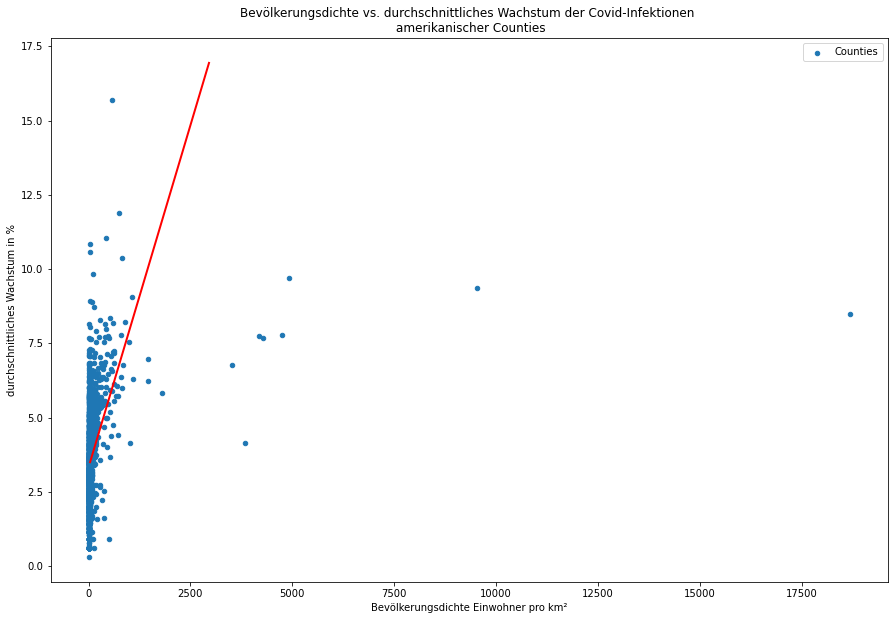

In [66]:
#Hiermit könnte man die 10 am meisten Bevölkerten Counties löschen, da sie das Streudiagramm 
# und die daurauffolgenden Analysen sehr stark bei der grafischen Darstellung beeinflussen
#for j in range(10):    
#    idx = DFCounty['Density'].idxmax()
#    DFCounty = DFCounty.drop(idx)

f, ax = plt.subplots(1, 1, figsize = (15, 10))
DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax,label="Counties")
plt.plot(trend, preds2, c='red', linewidth=2)
ax.set_title('Bevölkerungsdichte vs. durchschnittliches Wachstum der Covid-Infektionen \n amerikanischer Counties')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [23]:
lm2.params

Intercept    3.504371
Density      0.000720
dtype: float64

Man sieht, dass die zwei Funktionen von deutschen und amerikanischen Gebieten relativ ähnlich verlaufen, jedoch gibt es in Amerika mehr ausreißer. 

In [24]:
from sklearn.cluster import KMeans
DFCountyfnl = DFCounty.drop(columns=['County','Area','Population'])
km = KMeans(n_clusters=10)
km.fit(DFCountyfnl)
y_km = km.predict(DFCountyfnl)

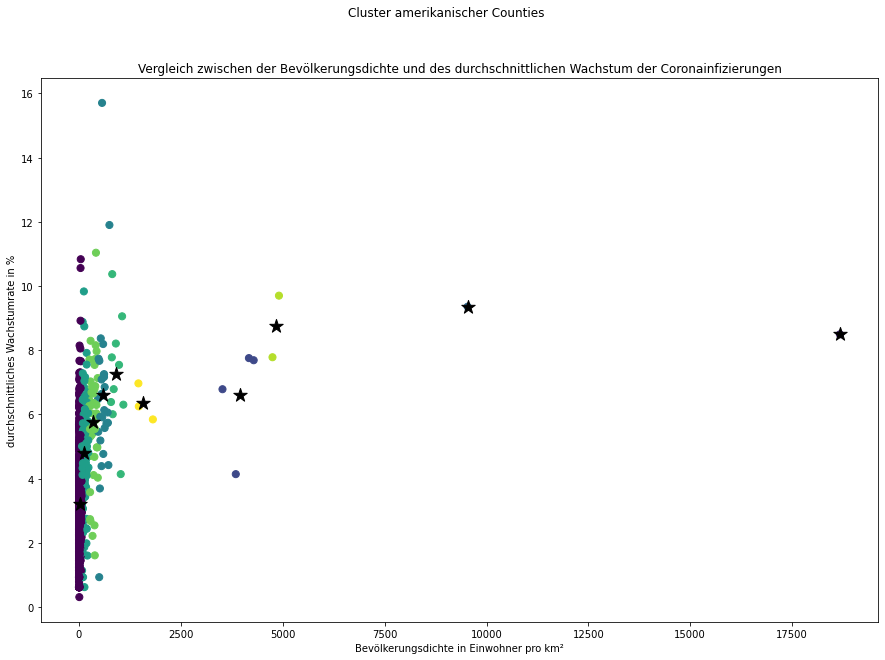

In [67]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
plt.scatter(DFCountyfnl["Density"], DFCountyfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster amerikanischer Counties")
plt.ylabel("durchschnittliches Wachstumrate in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')
#_ =plt.figure(figsize=(30, 25))

Cluster des zuvor erstellen Streudiagramms mit 4 Centers

In [70]:
import mglearn as mg
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [71]:
neigh = pd.DataFrame()
neigh = DFCountyfnl
neigh['Typ'] = 0
neigh = neigh.rename(columns={'Density':'Dichte'})
neighDE = pd.DataFrame()
neighDE = compLKfnl
neighDE['Typ'] = 1
neigh = neigh.append(neighDE)

In [72]:
y = neigh['Typ'].to_numpy()
X = neigh[['AGR','Dichte']].to_numpy()

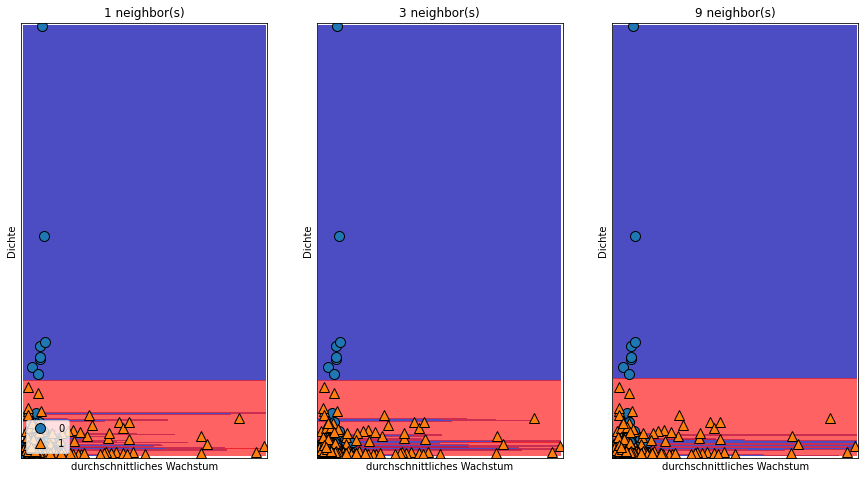

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

fig, axes = plt.subplots(1, 3, figsize=(15,8))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.7)
    mg.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("durchschnittliches Wachstum")
    ax.set_ylabel("Dichte")
    
axes[0].legend(loc=3)
plt.show()

In [30]:
print("Test set score: {:.5f}".format(score))
print("Test set predictions:\n{}".format(pred))

Test set score: 0.86939
Test set predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0

Neares Neigbor Untersuchung zwischen den zwei Merkmalen Bevölerungsdichte und durchschnittliche Wachstumsrate bei amerikanischen Counties und deutschen Landkreisen. Klassen habe ich hierbei. Deutschland = 1 und Amerika = 0 gemacht. Es sollte gesagt werden, dass es mehjr amerikanische Einträge gibt. Über eine bessere Klassenunterteilung sollte man sich auch noch gedanken machen. 
Hierbei ist alles schwer zu Erkennen, da es ein paar Ausreißer gibt. Man sollte überlegen wie viele Außreißer man heraussnimmt. Wie schon bei dem Scatterplot 

In [31]:
from sklearn.metrics import r2_score
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lmbay = smf.ols(formula='BY ~ datef', data=bundzuwachsraw_1).fit()
predbay = lmbay.predict(bundzuwachsraw_2['datef']).to_numpy()
BAY = bundzuwachsraw_2['BY'].to_numpy()

lmnw = smf.ols(formula='NW ~ datef', data=bundzuwachsraw_1).fit()
prednw = lmnw.predict(bundzuwachsraw_2['datef']).to_numpy()
NW = bundzuwachsraw_2['NW'].to_numpy()

#Bestimmtheitsmaß von Bayern und NRW
scoreby = r2_score(BAY,predbay)
scorenw = r2_score(NW,prednw)

print("Bayern: %.2f" %scoreby, ' NRW: %.2f' %scorenw)

Bayern: -15.22  NRW: -1.13


Man sieht dass die angeführten Prognosen in NRW mehr auf die Realität passen als die in Bayern, da das Bestimmtheitsmaß in NRW näher an 1 liegt als das von Bayern. Beide liegen unter den Prognosen. Das ist gut, jedoch hat Bayern laut dem Bestimmtheismaßes die Epidemie besser im Griff gehabt.